In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

In [13]:
from sklearn.linear_model import LinearRegression,LogisticRegression,\
RidgeClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn import tree

In [14]:
from kaggle_titanic import kaggle_titanic as kt

Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [175]:
filepath = "/home/bettina/ml/kaggle_titanic/kaggle_titanic/data/"
train_name = filepath + "train.csv"
test_name = filepath + "test.csv"
df=pd.read_csv(train_name)
test=pd.read_csv(test_name)

### How many entries are nan

In [157]:
pd.isna(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Clean train data and expand features

In [182]:
#variables = ['Pclass','Sex',"Fare","Age","SibSp","Parch","Embarked","Fam_size","cabin_no","ticket_no"]
X_all,y=kt.transform_data(df)
features = X_all.columns.tolist()
print(features,X_all.shape)

['Pclass', 'Fare', 'Age', 'SibSp', 'Parch', 'Fam_size', 'cabin_no', 'ticket_no', 'friend', 'Fare_person', 'Child', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'] (891, 16)


### Correlations between features

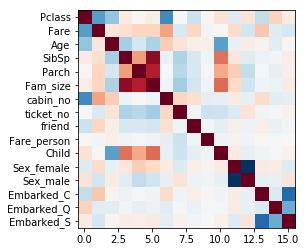

In [183]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(X_all.corr("pearson"),interpolation="nearest",cmap="RdBu_r",vmin=-1,vmax=1)
ax.set_yticks(np.arange(len(features)))
ax.set_yticklabels(features);

High correlations between different features. For better classification minimize number of correlated features and take only subset of them. Here choose following subset: ['Sex_female',"Fare","Age","Embarked_C","Embarked_Q","Fam_size","friend"] 

In [171]:
# selected_features = ["Fare","Age","Fam_size","friend","Sex_female","Embarked_C","Embarked_Q"]
selected_features = ["Pclass","Fare_person","Age","Fam_size","friend","Sex_female","Embarked_C","Embarked_Q"]
X=X_all[selected_features]

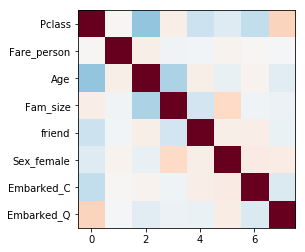

In [172]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(X.corr("pearson"),interpolation="nearest",cmap="RdBu_r",vmin=-1,vmax=1)
ax.set_yticks(np.arange(len(selected_features)))
ax.set_yticklabels(selected_features);

Separate training dataset into train and test dataset to test classifier model.

In [184]:
N=700
X_train,y_train = X.iloc[:N,:],y[:N]
X_test,y_test = X.iloc[N:,:],y[N:]
print(X_train.shape)

(700, 8)


In [185]:
model = kt.Model("NeuralNetwork")
clf, score, params = model.classify(X_train,y_train)
print(score)

0.81857145


Score=0.832, 159 of 191 passengers were correctly classified.


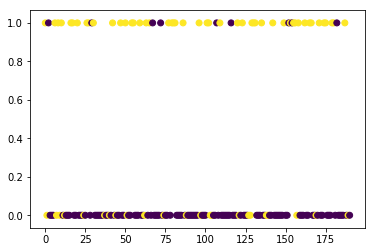

In [186]:
predictions = clf.predict(X_test)
predictions = (predictions.flatten() >0.5).astype(int)
# sc=clf.score(X_test,y_test)
sc=1-np.mean(np.abs(predictions-y_test))
print("Score={:.3f}, {} of {} passengers were correctly classified.".format(sc, int(sc*len(y_test)), len(y_test)))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.arange(predictions.size),predictions,c=y_test);

### Clean test data and expand features

In [127]:
X_test,y_test=kt.transform_data(test)
features = X_test.columns.tolist()
print(features)
X_test=X_test[selected_features]
print(X_test.shape)

['Pclass', 'Fare', 'Age', 'SibSp', 'Parch', 'Fam_size', 'cabin_no', 'ticket_no', 'friend', 'Fare_person', 'Child', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
(418, 9)


In [128]:
y_pred = clf.predict(X_test)
y_pred = (y_pred.flatten() >0.5).astype(int)

output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred})
output = output.astype('int')
output.to_csv('RFC_prediction_NN.csv', index=False)
print('Your file was successfully saved!')

Your file was successfully saved!
